In [88]:
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import xgboost as xgb
import seaborn as sns
from sklearn.neural_network import MLPRegressor

In [89]:
energy_daily = pd.read_csv('/Users/sakhulbay/Downloads/archive/daily_dataset.csv') 

household_info = pd.read_csv('/Users/sakhulbay/Downloads/archive/informations_households.csv')

weather_daily = pd.read_csv('/Users/sakhulbay/Downloads/archive/weather_daily_darksky.csv')


In [90]:
print("Columns of household:")

display(household_info.head()) 

Columns of household:


,LCLid,stdorToU,Acorn,Acorn_grouped,file
0,MAC005492,ToU,ACORN-,ACORN-,block_0
1,MAC001074,ToU,ACORN-,ACORN-,block_0
2,MAC000002,Std,ACORN-A,Affluent,block_0
3,MAC003613,Std,ACORN-A,Affluent,block_0
4,MAC003597,Std,ACORN-A,Affluent,block_0


In [91]:
print("")
print("Daily weater:")

display(weather_daily.head()) 


Daily weater:


,temperatureMax,temperatureMaxTime,windBearing,icon,dewPoint,temperatureMinTime,cloudCover,windSpeed,pressure,apparentTemperatureMinTime,...,temperatureHigh,sunriseTime,temperatureHighTime,uvIndexTime,summary,temperatureLowTime,apparentTemperatureMin,apparentTemperatureMaxTime,apparentTemperatureLowTime,moonPhase
0,11.96,2011-11-11 23:00:00,123,fog,9.40,2011-11-11 07:00:00,0.79,3.88,1016.08,2011-11-11 07:00:00,...,10.87,2011-11-11 07:12:14,2011-11-11 19:00:00,2011-11-11 11:00:00,Foggy until afternoon.,2011-11-11 19:00:00,6.48,2011-11-11 23:00:00,2011-11-11 19:00:00,0.52
1,8.59,2011-12-11 14:00:00,198,partly-cloudy-day,4.49,2011-12-11 01:00:00,0.56,3.94,1007.71,2011-12-11 02:00:00,...,8.59,2011-12-11 07:57:02,2011-12-11 14:00:00,2011-12-11 12:00:00,Partly cloudy throughout the day.,2011-12-12 07:00:00,0.11,2011-12-11 20:00:00,2011-12-12 08:00:00,0.53
2,10.33,2011-12-27 02:00:00,225,partly-cloudy-day,5.47,2011-12-27 23:00:00,0.85,3.54,1032.76,2011-12-27 22:00:00,...,10.33,2011-12-27 08:07:06,2011-12-27 14:00:00,2011-12-27 00:00:00,Mostly cloudy throughout the day.,2011-12-27 23:00:00,5.59,2011-12-27 02:00:00,2011-12-28 00:00:00,0.10
3,8.07,2011-12-02 23:00:00,232,wind,3.69,2011-12-02 07:00:00,0.32,3.00,1012.12,2011-12-02 07:00:00,...,7.36,2011-12-02 07:46:09,2011-12-02 12:00:00,2011-12-02 10:00:00,Partly cloudy throughout the day and breezy ov...,2011-12-02 19:00:00,0.46,2011-12-02 12:00:00,2011-12-02 19:00:00,0.25
4,8.22,2011-12-24 23:00:00,252,partly-cloudy-night,2.79,2011-12-24 07:00:00,0.37,4.46,1028.17,2011-12-24 07:00:00,...,7.93,2011-12-24 08:06:15,2011-12-24 15:00:00,2011-12-24 13:00:00,Mostly cloudy throughout the day.,2011-12-24 19:00:00,-0.51,2011-12-24 23:00:00,2011-12-24 20:00:00,0.99


In [92]:
print("")
print("Energy Daily:")

display(energy_daily.head()) 



Energy Daily:


,LCLid,day,energy_median,energy_mean,energy_max,energy_count,energy_std,energy_sum,energy_min
0,MAC000131,2011-12-15,0.4850,0.432045,0.868,22,0.239146,9.505,0.072
1,MAC000131,2011-12-16,0.1415,0.296167,1.116,48,0.281471,14.216,0.031
2,MAC000131,2011-12-17,0.1015,0.189812,0.685,48,0.188405,9.111,0.064
3,MAC000131,2011-12-18,0.1140,0.218979,0.676,48,0.202919,10.511,0.065
4,MAC000131,2011-12-19,0.1910,0.325979,0.788,48,0.259205,15.647,0.066


In [93]:
print("")
print("Info Household:")

print(household_info.info())


Info Household:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5566 entries, 0 to 5565
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   LCLid          5566 non-null   object
 1   stdorToU       5566 non-null   object
 2   Acorn          5566 non-null   object
 3   Acorn_grouped  5566 non-null   object
 4   file           5566 non-null   object
dtypes: object(5)
memory usage: 217.5+ KB
None


In [94]:
print("")

print("Daily Weather:")
print(weather_daily.info())


Daily Weather:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 882 entries, 0 to 881
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   temperatureMax               882 non-null    float64
 1   temperatureMaxTime           882 non-null    object 
 2   windBearing                  882 non-null    int64  
 3   icon                         882 non-null    object 
 4   dewPoint                     882 non-null    float64
 5   temperatureMinTime           882 non-null    object 
 6   cloudCover                   881 non-null    float64
 7   windSpeed                    882 non-null    float64
 8   pressure                     882 non-null    float64
 9   apparentTemperatureMinTime   882 non-null    object 
 10  apparentTemperatureHigh      882 non-null    float64
 11  precipType                   882 non-null    object 
 12  visibility                   882 non-null    float64
 13  humi

In [95]:
print("")
print("Energy Daily Info:")

print(energy_daily.info())


Energy Daily Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3510433 entries, 0 to 3510432
Data columns (total 9 columns):
 #   Column         Dtype  
---  ------         -----  
 0   LCLid          object 
 1   day            object 
 2   energy_median  float64
 3   energy_mean    float64
 4   energy_max     float64
 5   energy_count   int64  
 6   energy_std     float64
 7   energy_sum     float64
 8   energy_min     float64
dtypes: float64(6), int64(1), object(2)
memory usage: 241.0+ MB
None


In [96]:
print("Missing Values")
print("Household Info:")

print(household_info.isnull().sum())
print("")
print("Weather Daily:")

print(weather_daily.isnull().sum())
print("")
print("Energy Daily:")

print(energy_daily.isnull().sum())

Missing Values
Household Info:
LCLid            0
stdorToU         0
Acorn            0
Acorn_grouped    0
file             0
dtype: int64

Weather Daily:
temperatureMax                 0
temperatureMaxTime             0
windBearing                    0
icon                           0
dewPoint                       0
temperatureMinTime             0
cloudCover                     1
windSpeed                      0
pressure                       0
apparentTemperatureMinTime     0
apparentTemperatureHigh        0
precipType                     0
visibility                     0
humidity                       0
apparentTemperatureHighTime    0
apparentTemperatureLow         0
apparentTemperatureMax         0
uvIndex                        1
time                           0
sunsetTime                     0
temperatureLow                 0
temperatureMin                 0
temperatureHigh                0
sunriseTime                    0
temperatureHighTime            0
uvIndexTime         

In [97]:
print("Duplicate rows")
print("in Household Info:", household_info.duplicated().sum())

print("")
print("in Weather Daily:", weather_daily.duplicated().sum())

print("")
print("in Energy Daily:", energy_daily.duplicated().sum())

Duplicate rows
in Household Info: 0

in Weather Daily: 0

in Energy Daily: 0


In [98]:
household_info = household_info.dropna()  

weather_daily = weather_daily.dropna()

energy_daily = energy_daily.dropna() 

In [99]:
print("Missing Values")
print("in Household Info:")
print(household_info.isnull().sum())
print("")
print("in Weather Daily:")
print(weather_daily.isnull().sum())
print("")
print("in Energy Daily:")
print(energy_daily.isnull().sum())

Missing Values
in Household Info:
LCLid            0
stdorToU         0
Acorn            0
Acorn_grouped    0
file             0
dtype: int64

in Weather Daily:
temperatureMax                 0
temperatureMaxTime             0
windBearing                    0
icon                           0
dewPoint                       0
temperatureMinTime             0
cloudCover                     0
windSpeed                      0
pressure                       0
apparentTemperatureMinTime     0
apparentTemperatureHigh        0
precipType                     0
visibility                     0
humidity                       0
apparentTemperatureHighTime    0
apparentTemperatureLow         0
apparentTemperatureMax         0
uvIndex                        0
time                           0
sunsetTime                     0
temperatureLow                 0
temperatureMin                 0
temperatureHigh                0
sunriseTime                    0
temperatureHighTime            0
uvIndexTime   

LCLid            0
day              0
energy_median    0
energy_mean      0
energy_max       0
energy_count     0
energy_std       0
energy_sum       0
energy_min       0
dtype: int64


In [100]:
if 'day' in energy_daily.columns:
    energy_daily['date'] = pd.to_datetime(energy_daily['day'])
if 'time' in weather_daily.columns:
    weather_daily['date'] = pd.to_datetime(weather_daily['time'])


In [101]:
print(weather_daily[['time', 'date']].head())


                  time       date
0  2011-11-11 00:00:00 2011-11-11
1  2011-12-11 00:00:00 2011-12-11
2  2011-12-27 00:00:00 2011-12-27
3  2011-12-02 00:00:00 2011-12-02
4  2011-12-24 00:00:00 2011-12-24


In [102]:
print(energy_daily[['day', 'date']].head())


          day       date
0  2011-12-15 2011-12-15
1  2011-12-16 2011-12-16
2  2011-12-17 2011-12-17
3  2011-12-18 2011-12-18
4  2011-12-19 2011-12-19


In [103]:
print("Statistical Summary")
print("Daily Weathe:")

print(weather_daily.describe())

print("")
print("Daily Energy:")
print(energy_daily.describe()) 

Statistical Summary
Daily Weathe:
       temperatureMax  windBearing    dewPoint  cloudCover   windSpeed  \
count      881.000000   881.000000  881.000000  881.000000  881.000000   
mean        13.662747   195.712826    6.529750    0.477605    3.577696   
min         -0.060000     0.000000   -7.840000    0.000000    0.200000   
25%          9.490000   120.000000    3.180000    0.350000    2.370000   
50%         12.630000   219.000000    6.370000    0.470000    3.440000   
75%         17.920000   255.000000   10.060000    0.600000    4.570000   
max         32.400000   359.000000   17.770000    1.000000    9.960000   
std          6.185761    89.391048    4.833612    0.193514    1.690570   

          pressure  apparentTemperatureHigh  visibility    humidity  \
count   881.000000               881.000000  881.000000  881.000000   
mean   1014.151158                12.726016   11.168524    0.781782   
min     979.250000                -6.460000    1.480000    0.430000   
25%    1007.450

# Exploratory Data Analysis

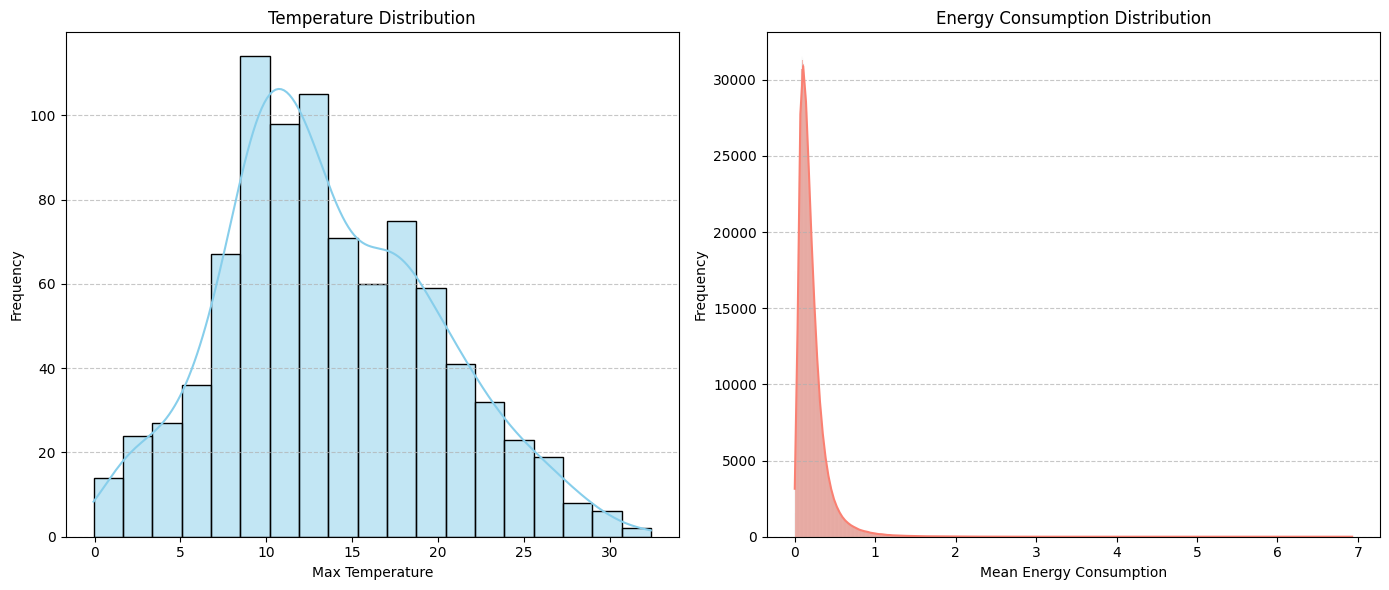

In [104]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)

sns.histplot(weather_daily['temperatureMax'], kde=True, color='skyblue')

plt.xlabel("Max Temperature")

plt.ylabel("Frequency")

plt.title("Temperature Distribution")

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.subplot(1, 2, 2)

sns.histplot(energy_daily['energy_mean'], kde=True, color='salmon')

plt.xlabel("Mean Energy Consumption")

plt.ylabel("Frequency")

plt.title("Energy Consumption Distribution")

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


In [105]:
data = pd.merge(energy_daily, weather_daily, on='date', how='inner')  

In [106]:
data.head()

,LCLid,day,energy_median,energy_mean,energy_max,energy_count,energy_std,energy_sum,energy_min,date,...,temperatureHigh,sunriseTime,temperatureHighTime,uvIndexTime,summary,temperatureLowTime,apparentTemperatureMin,apparentTemperatureMaxTime,apparentTemperatureLowTime,moonPhase
0,MAC000131,2011-12-15,0.4850,0.432045,0.868,22,0.239146,9.505,0.072,2011-12-15,...,7.97,2011-12-15 08:00:46,2011-12-15 14:00:00,2011-12-15 11:00:00,Partly cloudy throughout the day and breezy in...,2011-12-16 08:00:00,1.07,2011-12-15 21:00:00,2011-12-16 08:00:00,0.66
1,MAC000131,2011-12-16,0.1415,0.296167,1.116,48,0.281471,14.216,0.031,2011-12-16,...,4.53,2011-12-16 08:01:35,2011-12-16 15:00:00,2011-12-16 11:00:00,Mostly cloudy throughout the day.,2011-12-17 08:00:00,-2.65,2011-12-16 00:00:00,2011-12-17 08:00:00,0.70
2,MAC000131,2011-12-17,0.1015,0.189812,0.685,48,0.188405,9.111,0.064,2011-12-17,...,5.35,2011-12-17 08:02:21,2011-12-17 14:00:00,2011-12-17 11:00:00,Partly cloudy throughout the day.,2011-12-18 07:00:00,-3.56,2011-12-17 15:00:00,2011-12-18 06:00:00,0.73
3,MAC000131,2011-12-18,0.1140,0.218979,0.676,48,0.202919,10.511,0.065,2011-12-18,...,5.49,2011-12-18 08:03:04,2011-12-18 14:00:00,2011-12-18 12:00:00,Partly cloudy until evening.,2011-12-19 01:00:00,-4.12,2011-12-18 14:00:00,2011-12-19 02:00:00,0.77
4,MAC000131,2011-12-19,0.1910,0.325979,0.788,48,0.259205,15.647,0.066,2011-12-19,...,6.64,2011-12-19 08:03:43,2011-12-19 19:00:00,2011-12-19 11:00:00,Partly cloudy throughout the day.,2011-12-20 04:00:00,-3.67,2011-12-19 19:00:00,2011-12-20 08:00:00,0.81


In [107]:
data.columns

Index(['LCLid', 'day', 'energy_median', 'energy_mean', 'energy_max',
       'energy_count', 'energy_std', 'energy_sum', 'energy_min', 'date',
       'temperatureMax', 'temperatureMaxTime', 'windBearing', 'icon',
       'dewPoint', 'temperatureMinTime', 'cloudCover', 'windSpeed', 'pressure',
       'apparentTemperatureMinTime', 'apparentTemperatureHigh', 'precipType',
       'visibility', 'humidity', 'apparentTemperatureHighTime',
       'apparentTemperatureLow', 'apparentTemperatureMax', 'uvIndex', 'time',
       'sunsetTime', 'temperatureLow', 'temperatureMin', 'temperatureHigh',
       'sunriseTime', 'temperatureHighTime', 'uvIndexTime', 'summary',
       'temperatureLowTime', 'apparentTemperatureMin',
       'apparentTemperatureMaxTime', 'apparentTemperatureLowTime',
       'moonPhase'],
      dtype='object')

In [108]:
data.shape

(1534525, 42)

# Data Preparation for Model Development

In [109]:
X = data.drop(columns=['energy_sum'])

y = data['energy_sum']

In [110]:
X_numeric = X.select_dtypes(include=['number'])

In [111]:
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X_numeric) 

In [112]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)  

X_pca = pca.fit_transform(X_scaled)

print("Number of components after PCA:", X_pca.shape[1]) 

Number of components after PCA: 12


In [113]:

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42)


# Random Forest Model 

In [114]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

model = RandomForestRegressor(random_state=42) 

model.fit(X_train, y_train)   

RandomForestRegressor(random_state=42)

In [115]:
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)

mse = mean_squared_error(y_test, y_pred)

r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")

print(f"MSE: {mse}")

print(f"R²: {r2}") 

MAE: 0.8373354495547833
MSE: 1.9726095097035796
R²: 0.9833547442669145


# Resluts for Random Forest

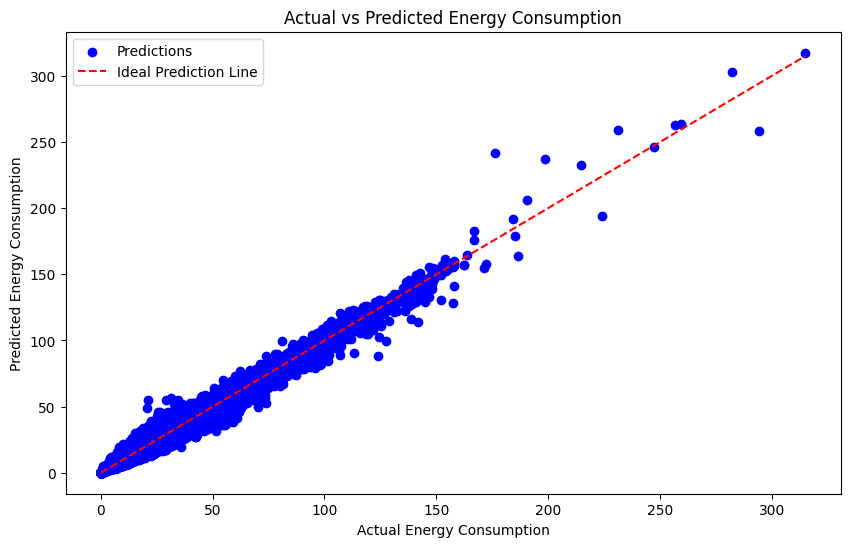

In [116]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

plt.scatter(y_test, y_pred, color='blue', label='Predictions')

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Ideal Prediction Line')

plt.xlabel('Actual Energy Consumption')

plt.ylabel('Predicted Energy Consumption')

plt.title('Actual vs Predicted Energy Consumption')

plt.legend()

plt.show() 

# XGBoost Model


In [117]:
xg_model = xgb.XGBRegressor(random_state=42)

xg_model.fit(X_train, y_train)

y_pred_xg = xg_model.predict(X_test) 

In [118]:
mae_xg = mean_absolute_error(y_test, y_pred_xg)

mse_xg = mean_squared_error(y_test, y_pred_xg)

r2_xg = r2_score(y_test, y_pred_xg) 

print(f"MAE: {mae_xg}")

print(f"MSE: {mse_xg}")

print(f"R²: {r2_xg}") 

MAE: 0.9268215262009016
MSE: 3.485186525539625
R²: 0.9705913305650502


# Results for XGBoost model

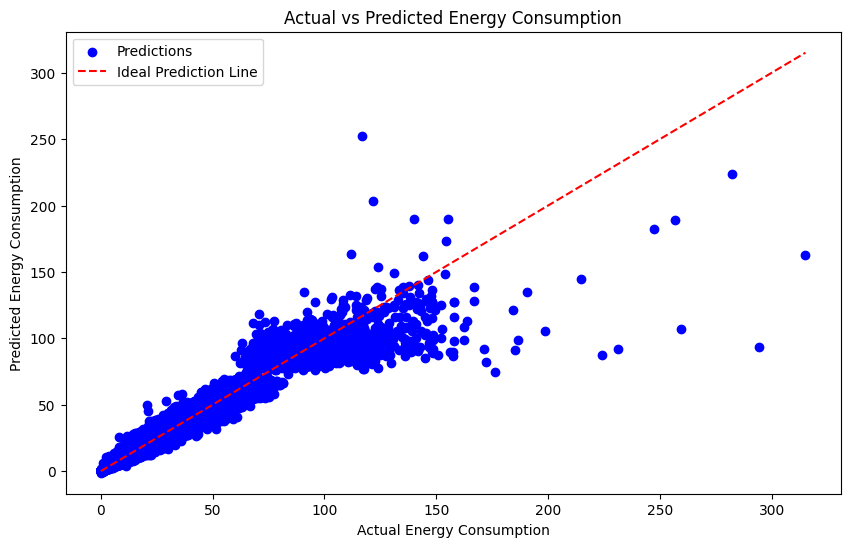

In [119]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

plt.scatter(y_test, y_pred_xg, color='blue', label='Predictions')

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Ideal Prediction Line')

plt.xlabel('Actual Energy Consumption')

plt.ylabel('Predicted Energy Consumption')

plt.title('Actual vs Predicted Energy Consumption')

plt.legend()

plt.show() 

# MLP Regressor Model


In [120]:
mlp_model = MLPRegressor(hidden_layer_sizes=(64, 32), random_state=42, max_iter=1000)

mlp_model.fit(X_train, y_train)

y_pred_mlp = mlp_model.predict(X_test) 

In [121]:
mae_mlp = mean_absolute_error(y_test, y_pred_mlp)

mse_mlp = mean_squared_error(y_test, y_pred_mlp)

r2_mlp = r2_score(y_test, y_pred_mlp) 

print(f"MAE: {mae_mlp}")

print(f"MSE: {mse_mlp}")

print(f"R²: {r2_mlp}") 

MAE: 0.5652726576494481
MSE: 0.8383194082041591
R²: 0.9929261007478039


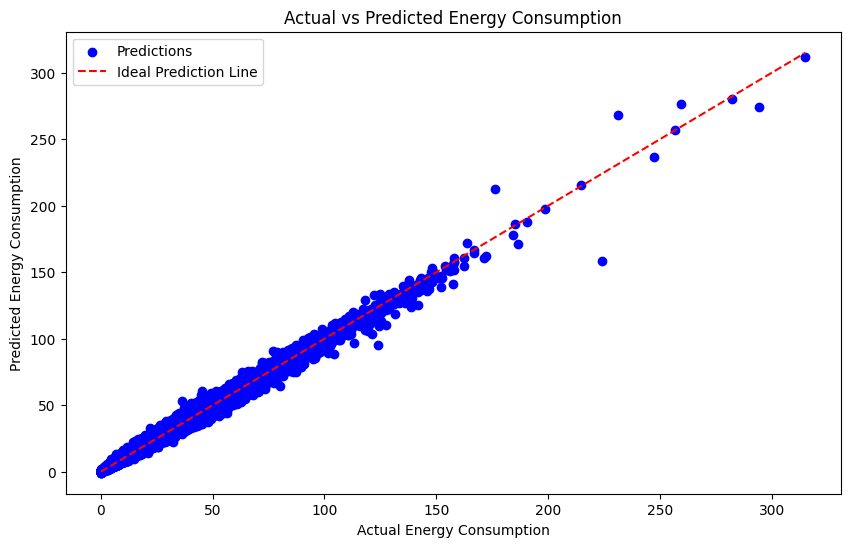

In [122]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

plt.scatter(y_test, y_pred_mlp, color='blue', label='Predictions')

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Ideal Prediction Line')

plt.xlabel('Actual Energy Consumption')

plt.ylabel('Predicted Energy Consumption')

plt.title('Actual vs Predicted Energy Consumption')

plt.legend()

plt.show() 

# Bar Chart Highlighting Model Performance Differences


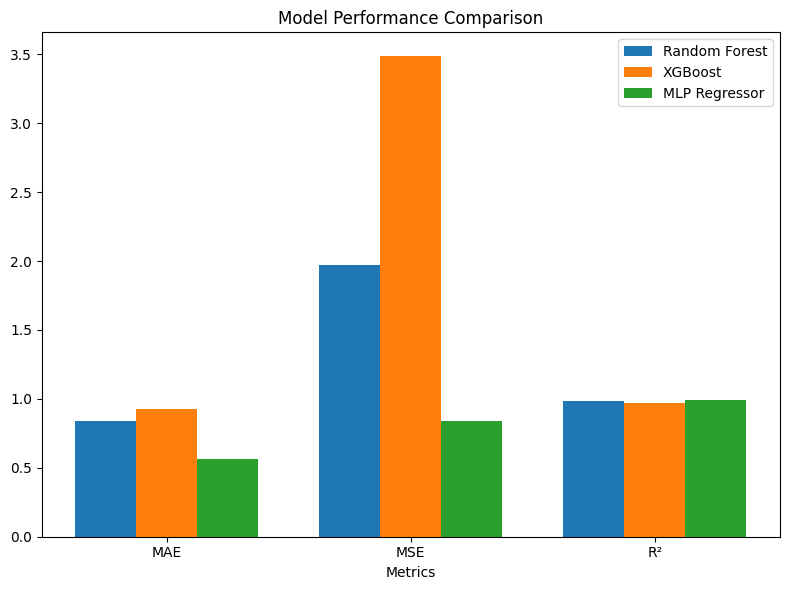

In [123]:
metrics = ['MAE', 'MSE', 'R²']

rf_scores = [mae, mse, r2]

xg_scores = [mae_xg, mse_xg, r2_xg]

mlp_scores = [mae_mlp, mse_mlp, r2_mlp]

x = np.arange(len(metrics))

width = 0.25 

fig, ax = plt.subplots(figsize=(8, 6))

rects1 = ax.bar(x - width, rf_scores, width, label='Random Forest')

rects2 = ax.bar(x, xg_scores, width, label='XGBoost')

rects3 = ax.bar(x + width, mlp_scores, width, label='MLP Regressor')

ax.set_xlabel('Metrics')

ax.set_title('Model Performance Comparison')

ax.set_xticks(x)

ax.set_xticklabels(metrics)

ax.legend() 

fig.tight_layout()

plt.show() 